### The Scenario:

One of the fastest growing startups in the logistics and delivery domain is thriving on making their customers happy.

To this end, We have conducted a survey of 126 of the most loyal customers that contains 7 features(The Y value will be a binary happiness value while the other features are integers from 1-5):

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

My first job then: is to build a machine learning model to predict customer's happiness, And reach 73% accuracy score or above.

### Sourcing and loading:
### Import Packages:

In [ ]:
!pip install pycaret[full]

In [ ]:
!python3 -m pip install --upgrade pip

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

### Load data:

In [ ]:
HS = pd.read_csv("ACME-HappinessSurvey2020.csv")

### Explore the data:

In [ ]:
HS.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
HS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


### Cleaning, transforming and visualizing:
### Cleaning the data:

Doing a reassignment to make relevant name changes to Y,X1,X2,X3,X4,X5,X6:


In [ ]:
HS.columns = ['happiness', 'delivered_on_Time', 'contents_as_expected', 
                'order_completed', 'good_Price', 'courier_satisfaction', 'app_satisfaction']
HS.head()

,happiness,delivered_on_Time,contents_as_expected,order_completed,good_Price,courier_satisfaction,app_satisfaction
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


### Missing Values:

In [ ]:
HS.isnull().sum()

happiness               0
delivered_on_Time       0
contents_as_expected    0
order_completed         0
good_Price              0
courier_satisfaction    0
app_satisfaction        0
dtype: int64

We have no missing values.

In [ ]:
HS['happiness'].value_counts()

1    69
0    57
Name: happiness, dtype: int64

Both values are close to each other (Synthetic Minority Over-sampling Technique is not needed).


In [ ]:
HS.groupby('happiness').mean()

,delivered_on_Time,contents_as_expected,order_completed,good_Price,courier_satisfaction,app_satisfaction
happiness,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


### Checking the features' distribution:

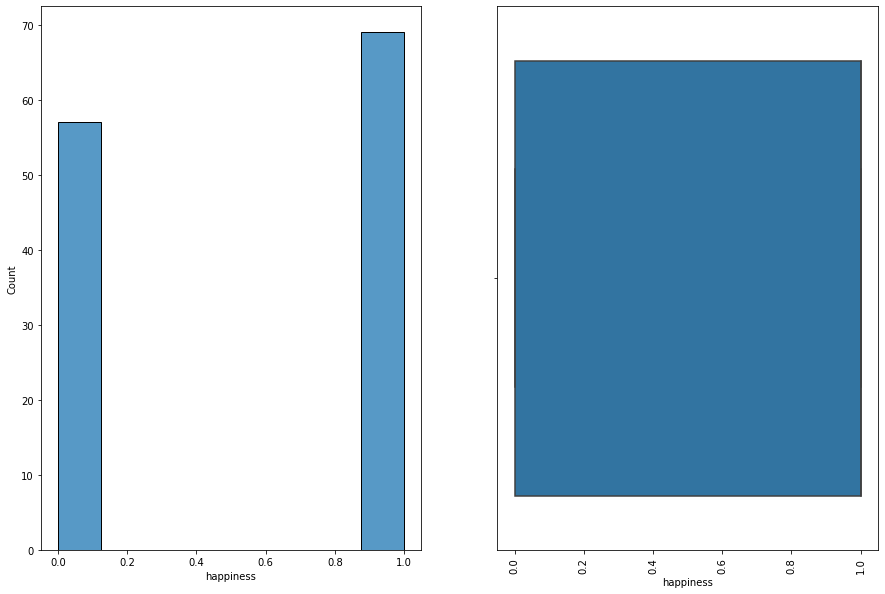

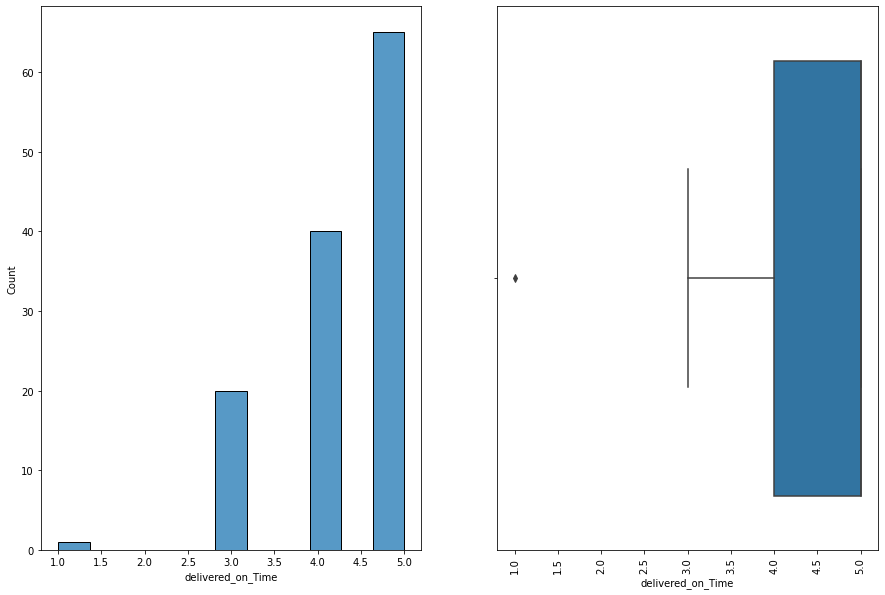

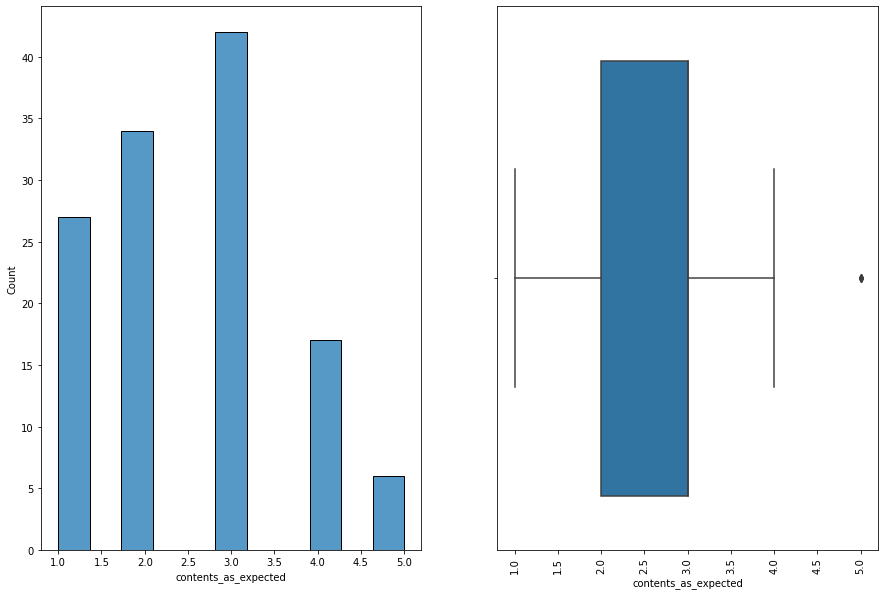

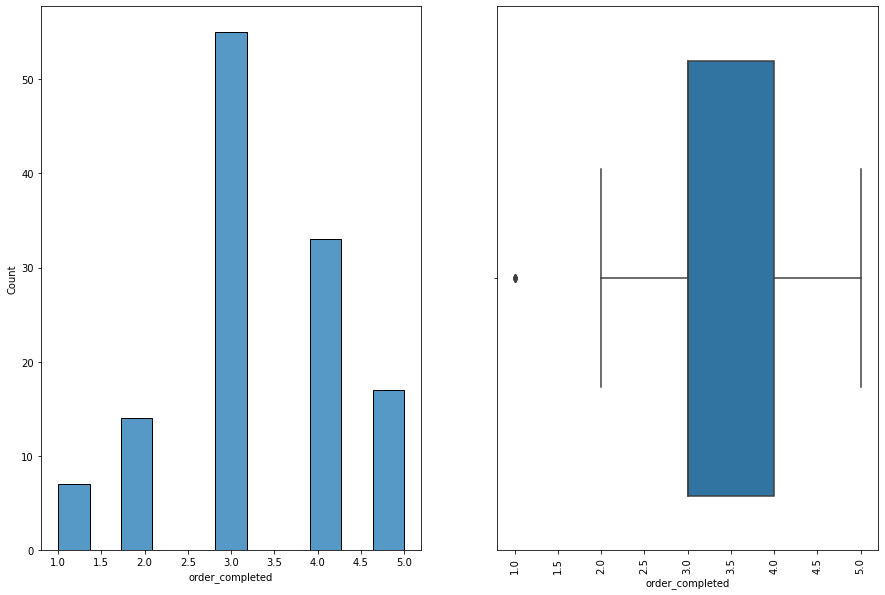

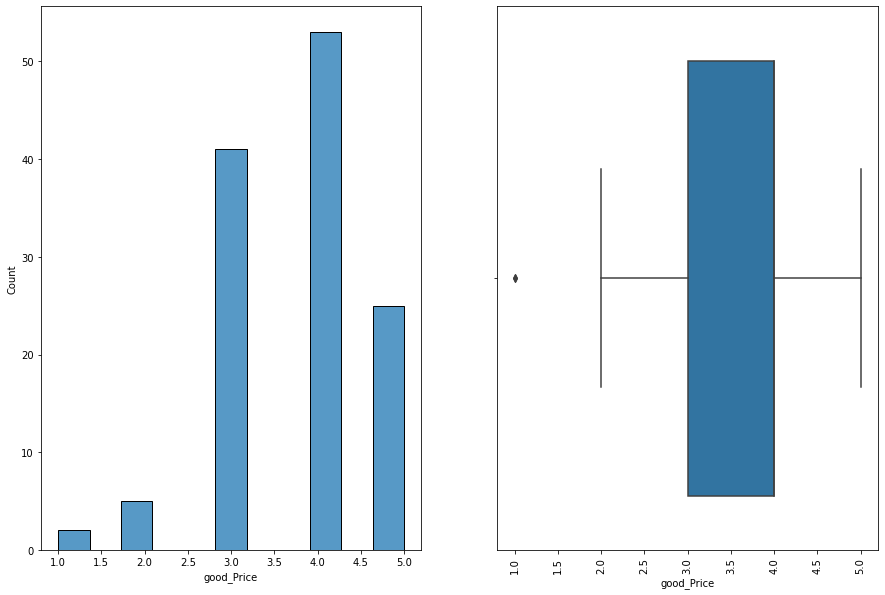

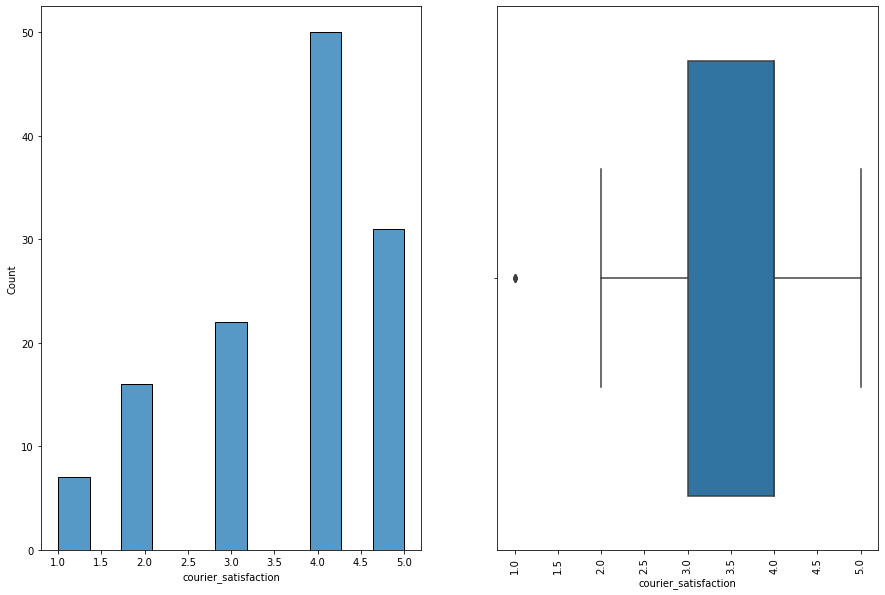

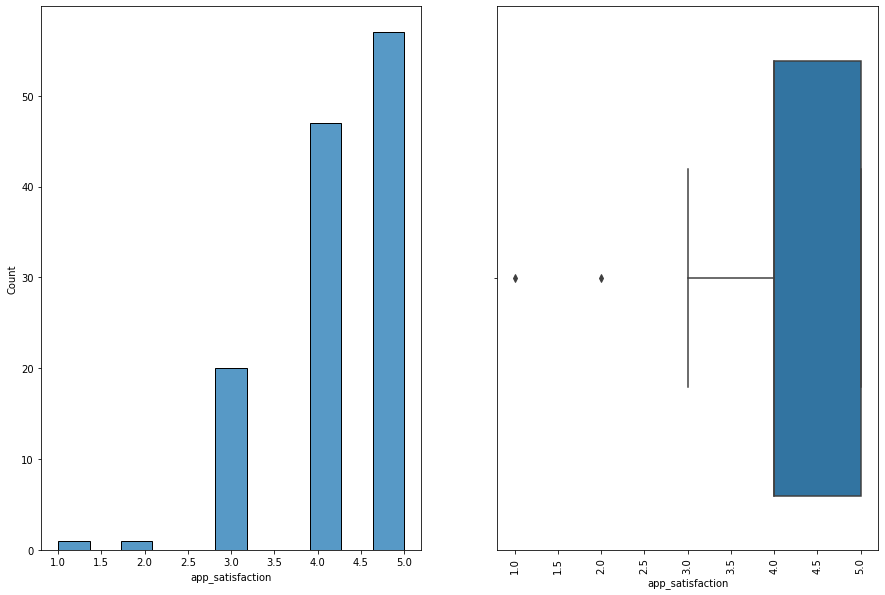

In [ ]:
for i in HS:
    fig, ax = plt.subplots(1, 2, figsize=(15,10))
    sns.histplot(data=HS, x=HS[i], ax=ax[0])
    sns.boxplot(data=HS, x=HS[i], ax=ax[1])
    plt.xticks(rotation=90)
    plt.show()


The dataset has many differences in the ranges of values, Hence, Feature scaling is necessary (we will be using zscore method).

### Checking the correlation:

In [ ]:
cor = HS.corr()['happiness'].sort_values(ascending=False)
cor.head(10)

happiness               1.000000
delivered_on_Time       0.280160
courier_satisfaction    0.224522
app_satisfaction        0.167669
order_completed         0.150838
good_Price              0.064415
contents_as_expected   -0.024274
Name: happiness, dtype: float64

After checking the correlation we found out that: both 'contents_as_expected'and'good_Price' features have a very low correlation with the output, that means they can be dropped.

### Plot the correlation heatmap for the features:

In [ ]:
correlation = HS.corr().round(2)
correlation.style.background_gradient()

,happiness,delivered_on_Time,contents_as_expected,order_completed,good_Price,courier_satisfaction,app_satisfaction
happiness,1.000000,0.280000,-0.020000,0.150000,0.060000,0.220000,0.170000
delivered_on_Time,0.280000,1.000000,0.060000,0.280000,0.090000,0.430000,0.410000
contents_as_expected,-0.020000,0.060000,1.000000,0.180000,0.110000,0.040000,-0.060000
order_completed,0.150000,0.280000,0.180000,1.000000,0.300000,0.360000,0.200000
good_Price,0.060000,0.090000,0.110000,0.300000,1.000000,0.290000,0.220000
courier_satisfaction,0.220000,0.430000,0.040000,0.360000,0.290000,1.000000,0.320000
app_satisfaction,0.170000,0.410000,-0.060000,0.200000,0.220000,0.320000,1.000000


Our dataset doesn't suffer from multicollinearity.

# Modelling:

### First experiment (including all features):

In [ ]:
df = HS.sample(frac = 0.90 , random_state = 123)
df.shape

(113, 7)

In [ ]:
df_unseen = HS.drop(df.index)
df_unseen.shape

(13, 7)

In [ ]:
df.head()

,happiness,delivered_on_Time,contents_as_expected,order_completed,good_Price,courier_satisfaction,app_satisfaction
4,0,5,4,3,3,3,5
115,0,5,3,5,4,5,5
89,0,3,3,1,3,2,3
81,0,3,3,3,3,3,4
42,0,5,2,3,3,4,5


In [ ]:
df.reset_index(inplace=True, drop= True)
df.head()

,happiness,delivered_on_Time,contents_as_expected,order_completed,good_Price,courier_satisfaction,app_satisfaction
0,0,5,4,3,3,3,5
1,0,5,3,5,4,5,5
2,0,3,3,1,3,2,3
3,0,3,3,3,3,3,4
4,0,5,2,3,3,4,5


In [ ]:
df_unseen.head()

,happiness,delivered_on_Time,contents_as_expected,order_completed,good_Price,courier_satisfaction,app_satisfaction
17,1,5,1,4,3,4,5
57,0,4,4,4,4,3,4
66,0,3,3,3,5,4,3
83,1,5,3,2,4,4,4
86,1,5,3,3,3,5,5


In [ ]:
df_unseen.reset_index(inplace=True, drop= True)
df_unseen.tail()

,happiness,delivered_on_Time,contents_as_expected,order_completed,good_Price,courier_satisfaction,app_satisfaction
8,1,4,2,3,4,3,3
9,0,5,2,3,3,3,5
10,1,5,1,5,3,5,5
11,1,5,3,4,4,4,4
12,0,5,1,4,4,4,5


In [ ]:
print('Data for modeling:' + str(df.shape))
print('Unseen Data for prediction:' + str(df_unseen.shape))

Data for modeling:(113, 7)
Unseen Data for prediction:(13, 7)


In [ ]:
from pycaret.classification import *

cat_features= ['delivered_on_Time', 'contents_as_expected', 'order_completed', 'good_Price', 'courier_satisfaction', 'app_satisfaction']

exp1 = setup(df, target = 'happiness', session_id = 123,remove_multicollinearity = True, train_size= 0.90,
                multicollinearity_threshold = 0.95,use_gpu = True,categorical_features = cat_features,
                  normalize = True, transformation = True)

,Description,Value
0,session_id,123
1,Target,happiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(113, 7)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare models:

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6045,0.6003,0.5933,0.5967,0.5886,0.2270,0.2112,0.0130
gbc,Gradient Boosting Classifier,0.5827,0.6240,0.6633,0.5764,0.6129,0.1650,0.1694,0.0780
svm,SVM - Linear Kernel,0.5745,0.0000,0.6200,0.6137,0.5660,0.1535,0.1494,0.0100
lr,Logistic Regression,0.5736,0.5697,0.6300,0.6058,0.5973,0.1407,0.1483,0.0190
catboost,CatBoost Classifier,0.5645,0.5783,0.6667,0.5646,0.6072,0.1220,0.1212,0.4240
rf,Random Forest Classifier,0.5545,0.6048,0.6500,0.5422,0.5891,0.1011,0.0810,0.2050
lightgbm,Light Gradient Boosting Machine,0.5527,0.6607,0.5733,0.5538,0.5435,0.1088,0.0931,0.0450
knn,K Neighbors Classifier,0.5445,0.6055,0.6533,0.5552,0.5932,0.0808,0.0841,0.0160
et,Extra Trees Classifier,0.5345,0.5542,0.5700,0.5327,0.5472,0.0611,0.0395,0.1660
dummy,Dummy Classifier,0.5245,0.5000,1.0000,0.5245,0.6873,0.0000,0.0000,0.0100


### Create model:
### Train individual model:

In [ ]:
dt = create_model('dt', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.55,0.60,0.50,0.60,0.55,0.10,0.10
1,0.70,0.70,0.60,0.75,0.67,0.40,0.41
2,0.50,0.52,0.80,0.50,0.62,0.00,0.00
3,0.60,0.56,0.60,0.60,0.60,0.20,0.20
4,1.00,1.00,1.00,1.00,1.00,1.00,1.00
5,0.60,0.60,0.60,0.60,0.60,0.20,0.20
6,0.30,0.30,0.20,0.25,0.22,-0.40,-0.41
7,0.70,0.66,0.80,0.67,0.73,0.40,0.41
8,0.90,0.90,0.83,1.00,0.91,0.80,0.82


In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### Predict our model on test Sample:

In [ ]:
unseen_pred = predict_model (dt, data = df_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.4615,0.5250,0.2500,0.6667,0.3636,0.0421,0.0577


We got good results on the train set (accuracy 0.6) but bad results on unseen data (accuracy 0.46).
We have overfitting, Which is a classic problem for dt.

### Plot ROC curves:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


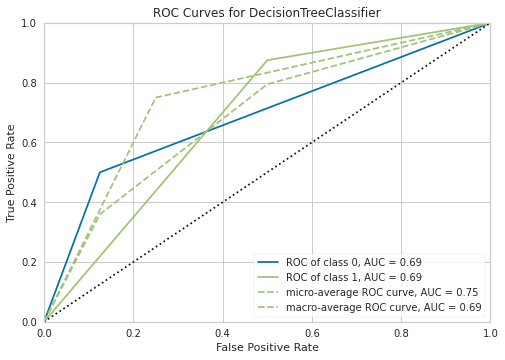

In [ ]:
plot_model(dt)

### Confusion Matrix:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


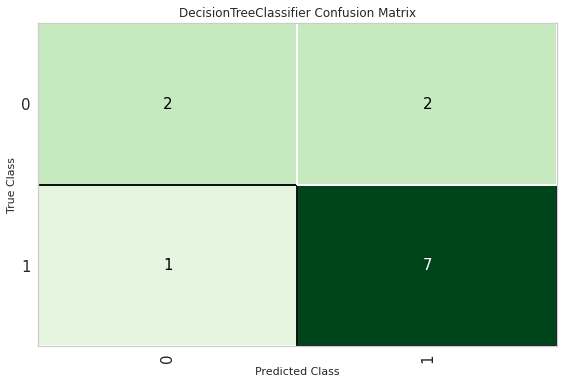

In [ ]:
plot_model(dt , plot = 'confusion_matrix')

The decision tree model has high bias towards happy customers (9 versus 3) and a very lower accuracy (46%),
This model has to be tuned.

### Hyperparameter tuning:

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.5333,0.6667,0.5714,0.6154,0.0678,0.0690
1,0.7000,0.7000,0.8000,0.6667,0.7273,0.4000,0.4082
2,0.8000,0.8000,1.0000,0.7143,0.8333,0.6000,0.6547
3,0.7000,0.7000,0.6000,0.7500,0.6667,0.4000,0.4082
4,0.8000,0.8000,0.8000,0.8000,0.8000,0.6000,0.6000
5,0.6000,0.6000,0.4000,0.6667,0.5000,0.2000,0.2182
6,0.6000,0.6000,0.6000,0.6000,0.6000,0.2000,0.2000
7,0.8000,0.8000,0.6000,1.0000,0.7500,0.6000,0.6547
8,0.5000,0.4583,0.6667,0.5714,0.6154,-0.0870,-0.0891


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
unseen_pred1 = predict_model(tuned_dt, data = df_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7692,0.7375,0.8750,0.7778,0.8235,0.4935,0.5007


The accuracy has improved very well (above 73%).

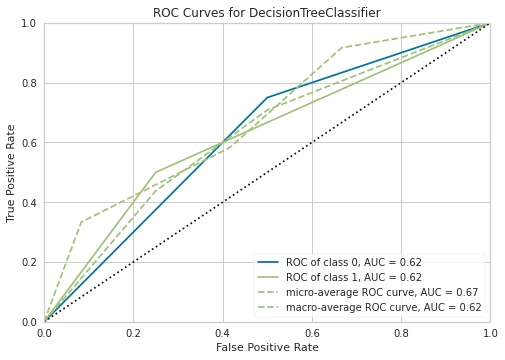

In [ ]:
plot_model(tuned_dt)

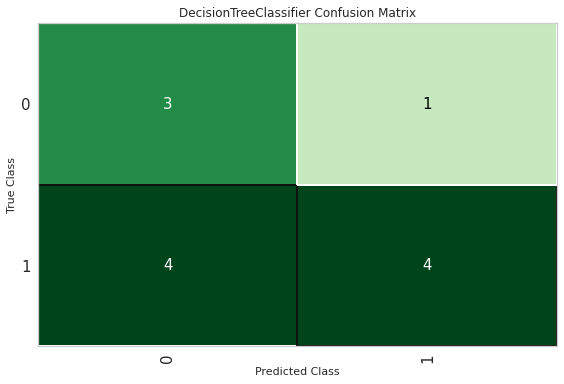

In [ ]:
plot_model(tuned_dt , plot = 'confusion_matrix')

The tuned decision tree model showcases slight bias towards predicting unhappy customers (5 vs 7) and has a very figh accuracy 76.9% therefore it will be selected.

### Second experiment:
#### (drop the less important features: 'contents_as_expected'and'good_Price'):

In [ ]:
exp2 = setup(df, target = 'happiness', session_id = 123,remove_multicollinearity = True, train_size= 0.90,
                multicollinearity_threshold = 0.95,use_gpu = True,categorical_features = cat_features,
                 ignore_features = ['contents_as_expected','good_Price'], normalize = True, transformation = True)

,Description,Value
0,session_id,123
1,Target,happiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(113, 7)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare models:

In [ ]:
best1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6718,0.6673,0.8033,0.6620,0.7055,0.3453,0.3559,0.0130
rf,Random Forest Classifier,0.6245,0.5965,0.6567,0.6038,0.6261,0.2636,0.2497,0.2260
catboost,CatBoost Classifier,0.6245,0.6170,0.6767,0.6038,0.6331,0.2636,0.2497,0.2520
nb,Naive Bayes,0.6145,0.6253,0.5833,0.5952,0.5644,0.2196,0.2294,0.0110
gbc,Gradient Boosting Classifier,0.5927,0.5998,0.7033,0.6014,0.6451,0.1754,0.1758,0.0730
lr,Logistic Regression,0.5755,0.6072,0.6700,0.6124,0.6136,0.1487,0.1628,0.0200
ridge,Ridge Classifier,0.5655,0.0000,0.6700,0.5957,0.6092,0.1259,0.1372,0.0290
dt,Decision Tree Classifier,0.5545,0.5853,0.5700,0.5795,0.5641,0.1065,0.1040,0.0140
ada,Ada Boost Classifier,0.5455,0.6037,0.6100,0.5910,0.5797,0.0887,0.0973,0.1070
lda,Linear Discriminant Analysis,0.5455,0.5925,0.6500,0.5812,0.5933,0.0859,0.0884,0.0140


### Create model:
### Train individual model:

In [ ]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.8167,0.8333,0.8333,0.8333,0.6333,0.6333
1,0.5000,0.5600,0.8000,0.5000,0.6154,0.0000,0.0000
2,0.9000,0.8000,1.0000,0.8333,0.9091,0.8000,0.8165
3,0.8000,0.7400,1.0000,0.7143,0.8333,0.6000,0.6547
4,0.8000,0.7400,1.0000,0.7143,0.8333,0.6000,0.6547
5,0.6000,0.5400,0.6000,0.6000,0.6000,0.2000,0.2000
6,0.5000,0.7000,1.0000,0.5000,0.6667,0.0000,0.0000
7,0.8000,0.8600,0.8000,0.8000,0.8000,0.6000,0.6000
8,0.6000,0.5417,0.8333,0.6250,0.7143,0.0909,0.1021


In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


### Predict on test Sample:

In [ ]:
unseen_pred2 = predict_model (knn, data = df_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6923,0.6750,0.7500,0.7500,0.7500,0.3500,0.3500


### Confusion Matrix:

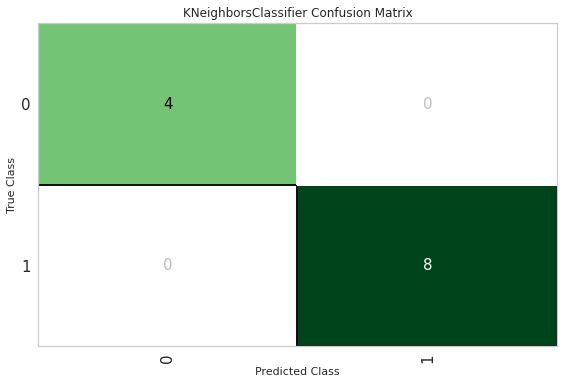

In [ ]:
plot_model(knn , plot = 'confusion_matrix')

In [ ]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.7333,0.8333,0.7143,0.7692,0.4407,0.4485
1,0.6000,0.6800,0.8000,0.5714,0.6667,0.2000,0.2182
2,0.8000,0.7600,1.0000,0.7143,0.8333,0.6000,0.6547
3,0.8000,0.8000,1.0000,0.7143,0.8333,0.6000,0.6547
4,0.9000,0.8000,1.0000,0.8333,0.9091,0.8000,0.8165
5,0.5000,0.5400,0.4000,0.5000,0.4444,0.0000,0.0000
6,0.6000,0.8400,1.0000,0.5556,0.7143,0.2000,0.3333
7,0.8000,0.8800,0.8000,0.8000,0.8000,0.6000,0.6000
8,0.5000,0.5833,0.6667,0.5714,0.6154,-0.0870,-0.0891


In [ ]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')


In [ ]:
unseen_pred3 = predict_model (tuned_knn, data = df_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6923,0.7250,0.7500,0.7500,0.7500,0.3500,0.3500


The accuracy has dropped a little bit.

### Confusion Matrix:

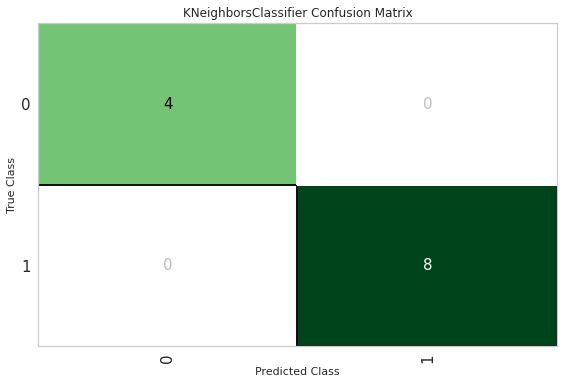

In [ ]:
plot_model(tuned_knn , plot = 'confusion_matrix')

### Conclusion:

* Based on the correlation heatmap ‘delivered_on_time’ has the highest correlation with the output, Which means it has the most impact on customer happiness, followed by ‘courier_satisfaction’, ‘app_satisfaction’ and ‘order_completed’.

* The accuracy of our model decreased after dropping ‘good_Price’ and ‘contents_as_expected’features.

* After including all features, Decision tree was the best model, As it had the highest train and test accuracy (above 73% as requested).


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70585e11-e931-4b02-82fe-37874fe16c84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>